## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import sys

sys.path.append("/home/jovyan/work")

train_data = pd.read_csv('../../data/raw/train.csv')
test_data = pd.read_csv('../../data/raw/test.csv')
print(train_data.shape)
print(test_data.shape)

(8000, 22)
(3799, 21)


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

train_data_x = train_data.copy()
train_data_x = train_data_x.drop(['Id_old', 'Id'], axis=1)
train_data_target = train_data_x.pop('TARGET_5Yrs')

test_data_x = test_data.drop(['Id_old', 'Id'], axis=1)

# scaler = StandardScaler()
scaler = MinMaxScaler()

df_train_scaled = pd.DataFrame(scaler.fit_transform(train_data_x), columns=train_data_x.columns)
df_test_scaled = pd.DataFrame(scaler.fit_transform(test_data_x), columns=test_data_x.columns)

X_train, X_val, y_train, y_val = train_test_split(train_data_x, train_data_target, test_size=0.2, random_state=42)

X_train_sc, X_val_sc, y_train_sc, y_val_sc = train_test_split(df_train_scaled, train_data_target, test_size=0.2, random_state=42)

print(train_data.shape)
print(X_train.shape)
print(X_val.shape)

(8000, 22)
(6400, 19)
(1600, 19)


In [161]:
from sklearn.metrics import roc_auc_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_train, y_train)
X_val_sm, y_val_sm = sm.fit_resample(X_val, y_val)
# X_sm_sc, y_sm = sm.fit_resample(X_train_sc, y_train)
# X_val_smsc, y_val = sm.fit_resample(X_val_sc, y_val)

# Data Modelling: 
LinearSVC, LogisticRegression, RidgeClassifer, SGDClassifer, BaggingClassifier, RandomForestClassifier

### Logistic Regression

ROC_AUC Score: 0.722
-----------
Confusion Matrix with thresthold of 0.5:
TN: 917, FP: 420
FN: 474, TP: 863
1283 out of 2674 or 48% of players are predicted to be 5+ Yrs
-----------
Recall: 0.6455
Accuracy: 0.6657
Balanced Accuracy: 0.6657
F1: 0.6588
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.722


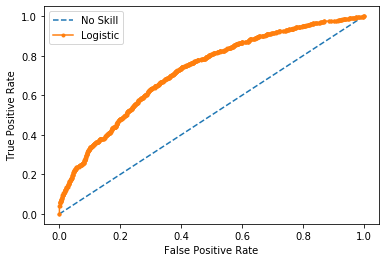

In [65]:
from sklearn.linear_model import LogisticRegression
from src.visualization.visualize import eval_metrics

linearclf = LogisticRegression(random_state=0, max_iter=2000).fit(X_sm, y_sm)
y_pred = linearclf.predict_proba(X_val_sm)[:,1]
eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

### Logistic Regression Elasticnet

ROC_AUC Score: 0.715
-----------
Confusion Matrix with thresthold of 0.5:
TN: 873, FP: 464
FN: 472, TP: 865
1329 out of 2674 or 50% of players are predicted to be 5+ Yrs
-----------
Recall: 0.647
Accuracy: 0.65
Balanced Accuracy: 0.65
F1: 0.6489
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.715


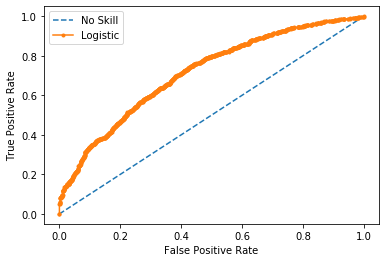

In [170]:
linearclf_en = LogisticRegression(random_state=0, penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=5000).fit(X_sm, y_sm)
y_pred = linearclf_en.predict_proba(X_val_sm)[:,1]
eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

### LinearSVC

In [167]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.calibration import CalibratedClassifierCV

lsvcclf = LinearSVC(random_state=0, max_iter=5000)
lsvcclf = CalibratedClassifierCV(base_estimator=lsvcclf, cv=5)
lsvcclf.fit(X_sm, y_sm)

y_pred = lsvcclf.predict_proba(X_val_sm)
# eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

In [168]:
print(f'ROC_AUC Score: \t {round(roc_auc_score(y_val_sm, y_pred[:,1]), 3)}')

ROC_AUC Score: 	 0.718


### RidgeClassifer

ROC_AUC Score: 0.717
-----------
Confusion Matrix with thresthold of 0.5:
TN: 871, FP: 466
FN: 465, TP: 872
1338 out of 2674 or 50% of players are predicted to be 5+ Yrs
-----------
Recall: 0.6522
Accuracy: 0.6518
Balanced Accuracy: 0.6518
F1: 0.652
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.717


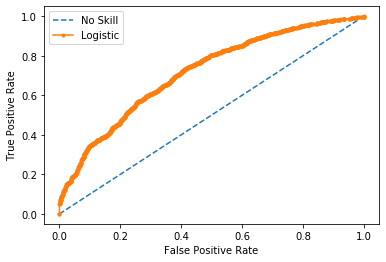

In [169]:
from sklearn.linear_model import RidgeClassifier

rdgclf = RidgeClassifier(normalize=False, solver='auto', random_state=0)
rdgclf = CalibratedClassifierCV(base_estimator=rdgclf, cv=5)
rdgclf = rdgclf.fit(X_sm, y_sm)
y_pred = rdgclf.predict_proba(X_val_sm)[:,1]
eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

### SGDClassifier

ROC_AUC Score: 0.715
-----------
Confusion Matrix with thresthold of 0.5:
TN: 875, FP: 462
FN: 471, TP: 866
1328 out of 2674 or 50% of players are predicted to be 5+ Yrs
-----------
Recall: 0.6477
Accuracy: 0.6511
Balanced Accuracy: 0.6511
F1: 0.6499
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.715


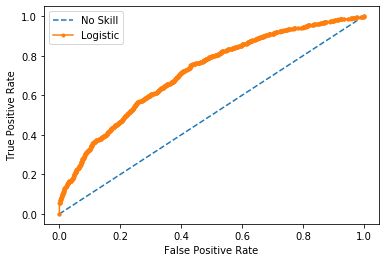

In [171]:
from sklearn.linear_model import SGDClassifier

sgdclf = SGDClassifier(loss='hinge', penalty='l1', l1_ratio=0.5)
sgdclf = CalibratedClassifierCV(base_estimator=sgdclf, cv=5)
sgdclf = sgdclf.fit(X_sm, y_sm)
y_pred = sgdclf.predict_proba(X_val_sm)[:,1]
eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

### BaggingClassifier

ROC_AUC Score: 0.854
-----------
Confusion Matrix with thresthold of 0.5:
TN: 777, FP: 560
FN: 88, TP: 1249
1809 out of 2674 or 68% of players are predicted to be 5+ Yrs
-----------
Recall: 0.9342
Accuracy: 0.7577
Balanced Accuracy: 0.7577
F1: 0.794
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.854


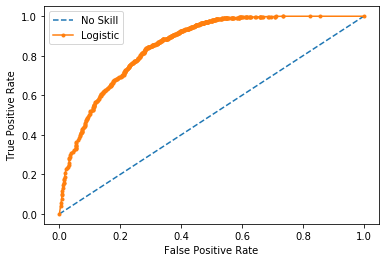

In [189]:
from sklearn.ensemble import BaggingClassifier

bcclf = BaggingClassifier()
bcclf = CalibratedClassifierCV(base_estimator=bcclf, cv=3)
bcclf = bcclf.fit(X_sm, y_sm)
y_pred = bcclf.predict_proba(X_val_sm)[:,1]
eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

In [183]:
submission = bcclf.predict_proba(df_test_scaled)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0210_baggingclassifier2.csv", index=False)

### RandomForestClassifier

ROC_AUC Score: 0.858
-----------
Confusion Matrix with thresthold of 0.5:
TN: 704, FP: 633
FN: 73, TP: 1264
1897 out of 2674 or 71% of players are predicted to be 5+ Yrs
-----------
Recall: 0.9454
Accuracy: 0.736
Balanced Accuracy: 0.736
F1: 0.7817
-----------
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.858


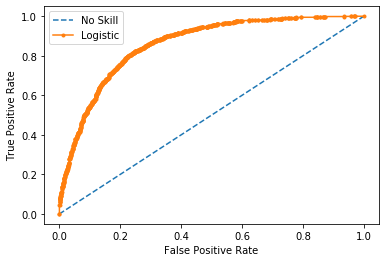

In [188]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()
rfclf = CalibratedClassifierCV(base_estimator=rfclf, cv=3)
rfclf = rfclf.fit(X_sm, y_sm)
y_pred = rfclf.predict_proba(X_val_sm)[:,1]
eval_metrics(y_pred, y_val_sm, praba_threshold=0.5)

In [186]:
submission = rfclf.predict_proba(df_test_scaled)[:,1]
submission = pd.DataFrame({'Id':test_data['Id'], 'TARGET_5Yrs':submission})
submission.to_csv("../../data/submission/0210_rf.csv", index=False)